<a href="https://colab.research.google.com/github/Asif1310/3005/blob/main/Clustering_the_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary modules
import numpy as np #array processing
import pandas as pd #dataframes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
db1 = pd.read_html('https://www.numbeo.com/crime/rankings_by_country.jsp') #importing crime index statistics
db1

[    0                                                  1
 0 NaN  whenDocReady(function() {  jQuery('#city_selec...,
      Rank               Country  Crime Index  Safety Index
 0     NaN             Venezuela        83.58         16.42
 1     NaN      Papua New Guinea        81.19         18.81
 2     NaN           Afghanistan        77.01         22.99
 3     NaN          South Africa        76.06         23.94
 4     NaN              Honduras        74.16         25.84
 ..    ...                   ...          ...           ...
 137   NaN                  Oman        19.99         80.01
 138   NaN           Isle Of Man        18.63         81.37
 139   NaN                Taiwan        15.87         84.13
 140   NaN  United Arab Emirates        15.14         84.86
 141   NaN                 Qatar        13.78         86.22
 
 [142 rows x 4 columns]]

In [3]:
db1 = db1[1:][:] #slicing to remove the first row

In [4]:
db1

[     Rank               Country  Crime Index  Safety Index
 0     NaN             Venezuela        83.58         16.42
 1     NaN      Papua New Guinea        81.19         18.81
 2     NaN           Afghanistan        77.01         22.99
 3     NaN          South Africa        76.06         23.94
 4     NaN              Honduras        74.16         25.84
 ..    ...                   ...          ...           ...
 137   NaN                  Oman        19.99         80.01
 138   NaN           Isle Of Man        18.63         81.37
 139   NaN                Taiwan        15.87         84.13
 140   NaN  United Arab Emirates        15.14         84.86
 141   NaN                 Qatar        13.78         86.22
 
 [142 rows x 4 columns]]

In [5]:
db1 = np.array(db1) #converting Python list to numpy array
db1.shape

(1, 142, 4)

In [6]:
db1 = pd.DataFrame(db1[0]) #converting numpy array to a dataframe

In [7]:
db1

,0,1,2,3
0,NaN,Venezuela,83.58,16.42
1,NaN,Papua New Guinea,81.19,18.81
2,NaN,Afghanistan,77.01,22.99
3,NaN,South Africa,76.06,23.94
4,NaN,Honduras,74.16,25.84
...,...,...,...,...
137,NaN,Oman,19.99,80.01
138,NaN,Isle Of Man,18.63,81.37
139,NaN,Taiwan,15.87,84.13
140,NaN,United Arab Emirates,15.14,84.86


In [8]:
db1.drop([0,3], axis =1, inplace = True) #dropping columns with 0 and 3 indices

In [9]:
db1

,1,2
0,Venezuela,83.58
1,Papua New Guinea,81.19
2,Afghanistan,77.01
3,South Africa,76.06
4,Honduras,74.16
...,...,...
137,Oman,19.99
138,Isle Of Man,18.63
139,Taiwan,15.87
140,United Arab Emirates,15.14


In [10]:
db2 = pd.read_html('https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world') #importing world happiness index report

In [11]:
db2 = np.array(db2) #converting python list to numpy array
db2.shape

(1, 146, 5)

In [12]:
db2 = pd.DataFrame(db2[0]) #converting numpy array to dataframe
db2

,0,1,2,3,4
0,1,Finland,7.842,7.809,5554960
1,2,Denmark,7.62,7.646,5834950
2,3,Switzerland,7.571,7.56,8773637
3,4,Iceland,7.554,7.504,345393
4,5,Netherlands,7.464,7.449,17211447
...,...,...,...,...,...
141,142,Lesotho,3.512,3.653,2175699
142,143,Botswana,3.467,3.479,2441162
143,144,Rwanda,3.415,3.312,13600464
144,145,Zimbabwe,3.145,3.299,15331428


In [13]:
db2.drop([0,3,4], axis = 1, inplace = True) #dropping columns with indices 0,3 & 4
db2

,1,2
0,Finland,7.842
1,Denmark,7.62
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
141,Lesotho,3.512
142,Botswana,3.467
143,Rwanda,3.415
144,Zimbabwe,3.145


In [14]:
db = pd.DataFrame.merge(db1 , db2 , on = 1 , how = 'inner') #merging two dataframes through an inner join
db

,1,2_x,2_y
0,Venezuela,83.58,4.892
1,Afghanistan,77.01,2.523
2,South Africa,76.06,4.956
3,Honduras,74.16,5.919
4,El Salvador,68.65,6.061
...,...,...,...
115,Japan,22.12,5.94
116,Hong Kong,21.92,5.477
117,Switzerland,21.68,7.571
118,Taiwan,15.87,6.584


In [15]:
db.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       120 non-null    object
 1   2_x     120 non-null    object
 2   2_y     120 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB


In [16]:
db.rename(columns={1: 'Country', '2_x': 'crime index','2_y':'happiness index'}, inplace=True) #renaming the column headers of the dataframe
db

,Country,crime index,happiness index
0,Venezuela,83.58,4.892
1,Afghanistan,77.01,2.523
2,South Africa,76.06,4.956
3,Honduras,74.16,5.919
4,El Salvador,68.65,6.061
...,...,...,...
115,Japan,22.12,5.94
116,Hong Kong,21.92,5.477
117,Switzerland,21.68,7.571
118,Taiwan,15.87,6.584


In [17]:
db3 = pd.read_html('https://worldpopulationreview.com/country-rankings/most-corrupt-countries') #importing corruption perception indices


In [18]:
db3 = np.array(db3) #converting python list to a numpy array
db3 = pd.DataFrame(db3[0]) #converting numpy array to a dataframe
db3

,0,1,2
0,New Zealand,88,4898203
1,Denmark,88,5834950
2,Finland,85,5554960
3,Singapore,85,5943546
4,Switzerland,85,8773637
...,...,...,...
170,Venezuela,15,29266991
171,Yemen,15,31154867
172,Syria,14,19364809
173,South Sudan,12,11618511


In [19]:
db3.drop(2, axis =1, inplace = True) #dropping column with index 2 from the dataframe
db3.rename(columns={0: 'Country', 1: 'corruption perception index'}, inplace=True) #renaming column headers

In [20]:
db = pd.DataFrame.merge(db , db3 , on = 'Country' , how = 'inner') #merging two dataframes through an inner join

In [21]:
db

,Country,crime index,happiness index,corruption perception index
0,Venezuela,83.58,4.892,15
1,Afghanistan,77.01,2.523,19
2,South Africa,76.06,4.956,44
3,Honduras,74.16,5.919,24
4,El Salvador,68.65,6.061,36
...,...,...,...,...
114,Japan,22.12,5.94,74
115,Hong Kong,21.92,5.477,77
116,Switzerland,21.68,7.571,85
117,Taiwan,15.87,6.584,65


In [22]:
db4 = pd.read_excel('https://github.com/Asif1310/3005/blob/main/FEMALE%20LITERACY%20FROM%20UNICEF.xlsx?raw=true') #importing the Excel file of youth literacy data from GitHub

In [23]:
db4.drop(0,axis = 0, inplace = True) #dropping the column with index 0 from dataframe

In [24]:
db4.dropna(inplace = True) #dropping all null values from dataframe
db4.drop('Time period', axis = 1, inplace = True) #dropping the Time period column from dataframe
db4.rename(columns={'Geographic area': 'Country', 'Unnamed: 2': 'Female literacy rate among the youth'}, inplace=True) #renaming the column headers of dataframe
db4

,Country,Female literacy rate among the youth
1,Afghanistan,41.59372
2,Albania,99.63000
3,Algeria,97.25216
4,Argentina,99.75765
5,Armenia,99.89736
...,...,...
88,Uruguay,99.32463
89,Uzbekistan,99.99992
90,Vanuatu,96.59661
91,Viet Nam,98.53767


In [25]:
db = pd.DataFrame.merge(db , db4 , on = 'Country' , how = 'inner') #merging two dataframes through an inner join

In [26]:
db

,Country,crime index,happiness index,corruption perception index,Female literacy rate among the youth
0,Afghanistan,77.01,2.523,19,41.59372
1,South Africa,76.06,4.956,44,98.82957
2,Honduras,74.16,5.919,24,97.28868
3,El Salvador,68.65,6.061,36,98.68684
4,Peru,67.1,5.84,38,99.35149
...,...,...,...,...,...
58,Saudi Arabia,24.72,6.494,53,99.44731
59,Rwanda,24.35,3.415,54,88.50182
60,Georgia,24.3,4.891,56,99.68220
61,Armenia,22.13,5.283,49,99.89736


In [27]:
data = db.iloc[:,1:] #separating the numeric columns of the dataframe from the country names
data

,crime index,happiness index,corruption perception index,Female literacy rate among the youth
0,77.01,2.523,19,41.59372
1,76.06,4.956,44,98.82957
2,74.16,5.919,24,97.28868
3,68.65,6.061,36,98.68684
4,67.1,5.84,38,99.35149
...,...,...,...,...
58,24.72,6.494,53,99.44731
59,24.35,3.415,54,88.50182
60,24.3,4.891,56,99.68220
61,22.13,5.283,49,99.89736


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   crime index                           63 non-null     object 
 1   happiness index                       63 non-null     object 
 2   corruption perception index           63 non-null     object 
 3   Female literacy rate among the youth  63 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


In [29]:
data = data.astype('float64') #converting the data in all the columns of dataframe to float64 datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   crime index                           63 non-null     float64
 1   happiness index                       63 non-null     float64
 2   corruption perception index           63 non-null     float64
 3   Female literacy rate among the youth  63 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [30]:
#feature scaling 
sc = StandardScaler() 
data = sc.fit_transform(data)
data

array([[ 2.13946731, -3.48123757, -1.73025847, -5.72162534],
       [ 2.07110916, -0.60812284,  0.22466053,  0.31965255],
       [ 1.93439287,  0.52907793, -1.33927467,  0.1570107 ],
       [ 1.5379156 ,  0.69676486, -0.40091355,  0.30458731],
       [ 1.42638388,  0.43578732, -0.24452003,  0.37474151],
       [ 1.41990784,  1.0144253 , -0.24452003,  0.38318978],
       [ 1.38968635, -0.38847659, -1.26107791, -1.4134428 ],
       [ 1.25368961, -1.05922429,  0.77203785,  0.04193522],
       [ 1.21339428,  0.54088687,  0.06826701,  0.41761194],
       [ 1.19180749, -0.84075893, -1.26107791, -2.90670608],
       [ 1.16374467, -0.52664117, -1.18288115,  0.00608074],
       [ 0.8010867 ,  0.0744338 ,  0.45925081,  0.43261913],
       [ 0.79029331,  1.13841916, -1.26107791, -0.20434809],
       [ 0.75071754,  0.63890106, -0.16632327,  0.36867974],
       [ 0.71689824,  0.34603939, -0.16632327,  0.34719809],
       [ 0.67012688,  0.32242151, -0.79189735,  0.42313752],
       [ 0.6449423 , -0.

In [42]:
metrics = [] #initializing a blank list
test_no_clusters = 6 
for num in range(1, test_no_clusters+1):
    kmeans = KMeans(n_clusters = num, init = 'k-means++', random_state = 32)
    kmeans.fit(data)
    metrics.append(kmeans.inertia_)

In [43]:
metrics

[252.00000000000006,
 182.64242701954726,
 127.56110175714082,
 100.23070490975309,
 83.2684213882386,
 70.2445950896139]

Text(0, 0.5, 'WCSS metric')

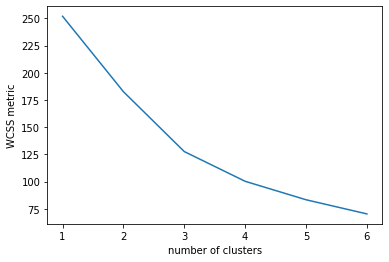

In [44]:
#elbow method to find the optimal number of clusters
plt.plot(range(1, test_no_clusters+1), metrics)
plt.xlabel('number of clusters')
plt.ylabel('WCSS metric')

In [45]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #dividing the dataset into 4 clusters
clusters = kmeans.fit_predict(data) #storing cluster numbers predicted

In [46]:
clusters = pd.Series(clusters)

In [47]:
db['Clusters'] = clusters
db

,Country,crime index,happiness index,corruption perception index,Female literacy rate among the youth,Clusters
0,Afghanistan,77.01,2.523,19,41.59372,1
1,South Africa,76.06,4.956,44,98.82957,3
2,Honduras,74.16,5.919,24,97.28868,3
3,El Salvador,68.65,6.061,36,98.68684,3
4,Peru,67.1,5.84,38,99.35149,3
...,...,...,...,...,...,...
58,Saudi Arabia,24.72,6.494,53,99.44731,0
59,Rwanda,24.35,3.415,54,88.50182,2
60,Georgia,24.3,4.891,56,99.68220,0
61,Armenia,22.13,5.283,49,99.89736,0


In [48]:
db[db['Clusters'] == 0] #cluster 1

,Country,crime index,happiness index,corruption perception index,Female literacy rate among the youth,Clusters
19,Costa Rica,53.86,7.069,57,99.53000,0
24,Uruguay,51.44,6.431,71,99.32463,0
27,Mauritius,48.9,6.049,53,99.35342,0
28,Greece,47.41,5.723,50,99.07000,0
35,Italy,45.2,6.483,53,99.95000,0
41,Montenegro,41.1,5.581,45,98.97000,0
43,Malta,40.82,6.602,53,99.56088,0
47,Latvia,38.65,6.032,57,99.86000,0
48,Serbia,38.29,6.078,38,99.99942,0
50,Spain,33.87,6.491,62,99.75504,0


In [49]:
db[db['Clusters'] == 1] #cluster 2

,Country,crime index,happiness index,corruption perception index,Female literacy rate among the youth,Clusters
0,Afghanistan,77.01,2.523,19,41.59372,1
9,Nigeria,63.84,4.759,25,68.26263,1
39,Pakistan,42.01,4.934,31,65.18558,1


In [50]:
db[db['Clusters'] == 2] #cluster 3

,Country,crime index,happiness index,corruption perception index,Female literacy rate among the youth,Clusters
7,Namibia,64.7,4.574,51,96.19844,2
16,Uganda,56.24,4.636,27,89.95064,2
17,Kenya,56.21,4.607,31,88.08000,2
20,Algeria,53.82,4.887,36,97.25216,2
26,Morocco,49.07,4.918,40,97.40000,2
29,Lebanon,46.87,4.584,25,99.83898,2
30,Ghana,46.81,5.088,43,92.20855,2
31,Myanmar,46.51,4.426,28,95.55290,2
32,Zambia,46.28,4.073,33,91.62819,2
33,Indonesia,46.12,5.345,37,99.78145,2


In [51]:
db[db['Clusters'] == 3] #cluster 4

,Country,crime index,happiness index,corruption perception index,Female literacy rate among the youth,Clusters
1,South Africa,76.06,4.956,44,98.82957,3
2,Honduras,74.16,5.919,24,97.28868,3
3,El Salvador,68.65,6.061,36,98.68684,3
4,Peru,67.1,5.84,38,99.35149,3
5,Brazil,67.01,6.33,38,99.43153,3
6,Cameroon,66.59,5.142,25,82.41000,3
8,Argentina,64.14,5.929,42,99.75765,3
10,Bangladesh,63.45,5.025,26,95.85875,3
11,Belarus,58.41,5.534,47,99.89983,3
12,Guatemala,58.26,6.435,25,93.86512,3
